In [1]:
from collections import defaultdict, Counter
import pandas as pd
from nltk import ngrams
import spacy
from matplotlib import pyplot as plt
%matplotlib inline

In [18]:
#!python -m spacy download en
_spacy = spacy.load("en_core_web_sm")

In [21]:
# _df = pd.concat([
#     pd.read_csv('/Users/mario/code/pb_speaker_adaptation/src/analysis/19dec/appliances.csv'),
#     pd.read_csv('/Users/mario/code/pb_speaker_adaptation/src/analysis/19dec/food.csv'),
#     pd.read_csv('/Users/mario/code/pb_speaker_adaptation/src/analysis/19dec/indoor.csv'),
#     pd.read_csv('/Users/mario/code/pb_speaker_adaptation/src/analysis/19dec/outdoor.csv'),
#     pd.read_csv('/Users/mario/code/pb_speaker_adaptation/src/analysis/19dec/vehicles.csv')
# ])

_df = pd.read_csv('/Users/mario/code/pb_speaker_adaptation/src/analysis/19dec/all.csv')
    # ,
    # error_bad_lines=False, warn_bad_lines=True)


/var/folders/0s/847v13g104z23kr193w_v2640000gn/T/ipykernel_18999/2926833025.py:9: DtypeWarning: Columns (29,30,31,32,33,34,35,36,54,55,56,57,58,59,60,61,102,103,104,105,106,107,108,109,128,129,130,131,132,133,134,135,152,153,154,155,156,157,158,159) have mixed types. Specify dtype option on import or set low_memory=False.
  _df = pd.read_csv('/Users/mario/code/pb_speaker_adaptation/src/analysis/19dec/all.csv')


In [22]:
# pd.to_numeric(df['target domain'], errors='coerce')

print('target domain   :', _df['target domain'].unique())
print('listener domain :', _df['listener domain'].unique())
print('simulator domain:', _df['simulator domain'].unique())
# _df = _df.dropna()
print('Data points:', len(_df))

# _df = _df[_df['listener domain'] != 'all']
# _df = _df[_df['simulator domain'] != 'all']
#
# id_df = _df[(_df['target domain'] == _df['listener domain'])]
# ood_df = _df[(_df['target domain'] != _df['listener domain'])]

# df = ood_df
# df.head(2)


target domain   : ['food' 'vehicles' 'outdoor' 'indoor' 'appliances']
listener domain : ['all']
simulator domain: ['all']
Data points: 4748


In [30]:
N_STEPS = 24

refs = _df['golden utt'].tolist()

hyps = {"h0": _df['original utt'].tolist()}
hyps.update(
    {f"h0 {s}": _df[f"adapted utt s{s}"].tolist() for s in range(N_STEPS)}
)

for k in hyps:
    hyps[k] = [x for x in hyps[k] if type(x) == str]
hyps.keys()

dict_keys(['h0', 'h0 0', 'h0 1', 'h0 2', 'h0 3', 'h0 4', 'h0 5', 'h0 6', 'h0 7', 'h0 8', 'h0 9', 'h0 10', 'h0 11', 'h0 12', 'h0 13', 'h0 14', 'h0 15', 'h0 16', 'h0 17', 'h0 18', 'h0 19', 'h0 20', 'h0 21', 'h0 22', 'h0 23'])

In [31]:
pos = defaultdict(lambda: defaultdict(lambda: Counter()))
MAX_N = 1

for ref in refs:
    pos_seq = [tok.pos_ for tok in _spacy(ref)]
    for N in range(1, MAX_N + 1):
        for ngram in ngrams(pos_seq, N):
            pos[N]['ref'][ngram] += 1        
            
for hyp_type in hyps:
    for hyp in hyps[hyp_type]:
        pos_seq = [tok.pos_ for tok in _spacy(hyp)]
        for N in range(1, MAX_N + 1):
            for ngram in ngrams(pos_seq, N):
                pos[N][hyp_type][ngram] += 1
                
for hyp_type in ['ref'] + list(hyps.keys()):
    for N in range(1, MAX_N + 1):
        tot = sum(pos[N][hyp_type].values())
        for k, v in pos[N][hyp_type].items():
            pos[N][hyp_type][k] = v / tot


In [32]:
for N in range(1, MAX_N + 1):
    for key, counter in pos[1].items():
        pos[N][key] = dict(sorted(counter.items(), key=lambda pair: pair[0], reverse=False)) 


In [33]:
pos_df_1 = pd.DataFrame(pos[1].values(), index=pos[1].keys())
# pos_df_2 = pd.DataFrame(pos[2].values(), index=pos[2].keys())
# pos_df_3 = pd.DataFrame(pos[3].values(), index=pos[3].keys())

Text(0.5, 1.0, 'POS distribution (general)')

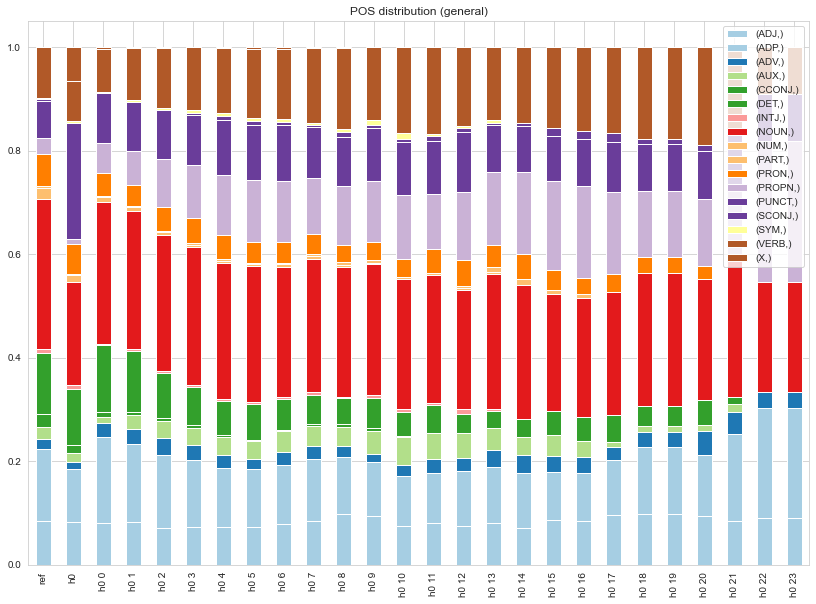

In [34]:
pos_df_1.plot(kind='bar', stacked=True, figsize=(14,10), colormap='Paired')
plt.title('POS distribution (general)')


In [14]:
pos_df_2.plot(kind='bar', stacked=True, figsize=(14,10))
plt.title('POS distribution')


NameError: name 'pos_df_2' is not defined

In [ ]:
pos_df_3.plot(kind='bar', stacked=True, figsize=(14,10))
plt.title('POS distribution')

